<a href="https://colab.research.google.com/github/AngelB26/ICTAK/blob/main/Ensembling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv('/content/train_loan (1).csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.shape

(614, 13)

In [5]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
#missing value handling

In [9]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [11]:
#numerical-mean/median
#categorical -mode

In [12]:
#remove id column

In [13]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [15]:
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [16]:
data['Gender']=data['Gender'].fillna('mode')

In [17]:
data['Married']=data['Married'].fillna('mode')

In [18]:
data['Dependents'].mode()

0    0
Name: Dependents, dtype: object

In [19]:
data['Dependents']=data['Dependents'].fillna(data['Dependents']).mode()[0]

In [20]:
data['Self_Employed']=data['Self_Employed'].fillna('mode')

In [21]:
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)

In [22]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean(), inplace=True)

In [23]:
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

In [24]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

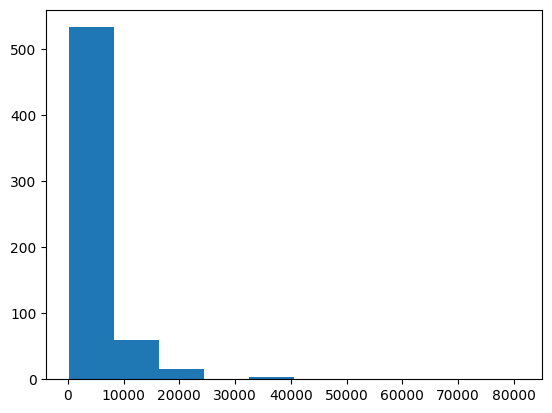

In [25]:
plt.hist(data['ApplicantIncome'])
plt.show

In [26]:
Q1 = data['ApplicantIncome'].quantile(0.25)
Q2 = data['ApplicantIncome'].quantile(0.5)
Q3 = data['ApplicantIncome'].quantile(0.75)

In [27]:
IQR = Q3 - Q1

In [28]:
low = Q1 - (1.5 * IQR)
up = Q3 + (1.5 * IQR)

In [29]:
print(low,up)

-1498.75 10171.25


In [30]:
data[(data['ApplicantIncome'] > 0)].index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            604, 605, 606, 607, 608, 609, 610, 611, 612, 613],
           dtype='int64', length=614)

In [31]:
print(data['ApplicantIncome'].skew())

6.539513113994625


In [32]:
#Flooring and capping for treating ouliers

print(data['ApplicantIncome'].quantile(0.10))
print(data['ApplicantIncome'].quantile(0.90))

2216.1
9459.900000000007


In [33]:
data["ApplicantIncome"] = np.where(data["ApplicantIncome"] <2216.1, 2216.1,data['ApplicantIncome'])
data["ApplicantIncome"] = np.where(data["ApplicantIncome"] >9459.9, 9459.9,data['ApplicantIncome'])
print(data['ApplicantIncome'].skew())

1.0177280847006949


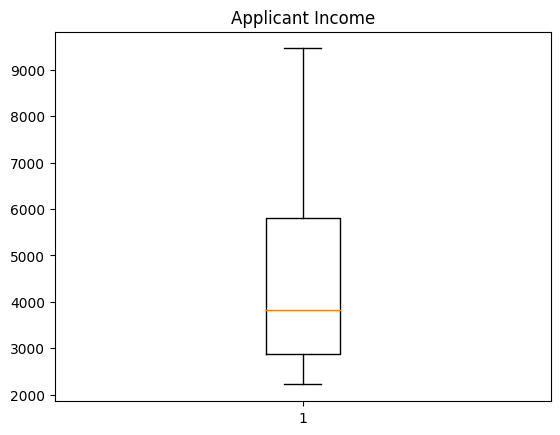

In [34]:
plt.boxplot(data['ApplicantIncome'])
plt.title('Applicant Income')
plt.show()

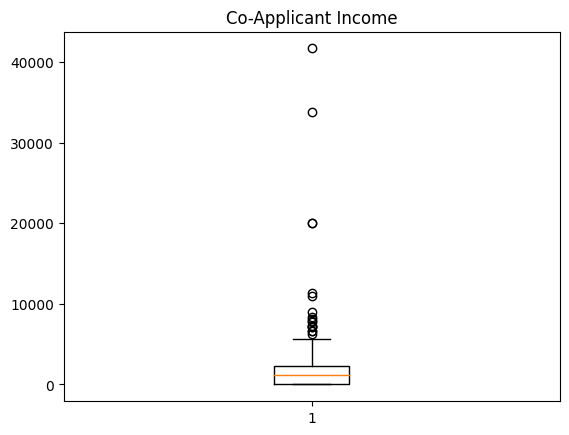

In [35]:
plt.boxplot(data['CoapplicantIncome'])
plt.title('Co-Applicant Income')
plt.show()

In [36]:
Q1a = data['CoapplicantIncome'].quantile(0.25)
Q2a = data['CoapplicantIncome'].quantile(0.5)
Q3a = data['CoapplicantIncome'].quantile(0.75)

In [37]:
IQRa = Q3a - Q1a
low_1 = Q1a - (1.5 * IQRa)
up_1 = Q3a + (1.5 * IQRa)

In [38]:
print(low_1,up_1)

-3445.875 5743.125


In [39]:
data[(data['CoapplicantIncome'] >= 1)].index

Int64Index([  1,   3,   5,   6,   7,   8,   9,  10,  11,  12,
            ...
            593, 596, 600, 601, 603, 605, 606, 607, 608, 611],
           dtype='int64', length=341)

In [40]:
print(data['CoapplicantIncome'].skew())

7.491531216657306


In [41]:
print(data['CoapplicantIncome'].quantile(0.10))
print(data['CoapplicantIncome'].quantile(0.90))

0.0
3782.200000000002


In [42]:
data['CoapplicantIncome'] = np.where(data['CoapplicantIncome'] <0.0, 0.0,data['CoapplicantIncome'])
data['CoapplicantIncome'] = np.where(data['CoapplicantIncome'] >3782.2, 3782.2,data['CoapplicantIncome'])
print(data['CoapplicantIncome'].skew())

0.5184989987479339


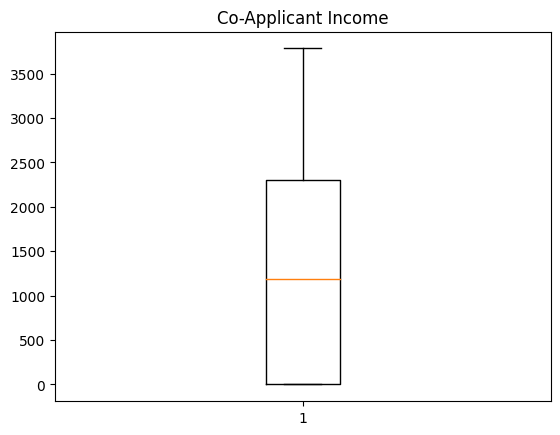

In [43]:
plt.boxplot(data['CoapplicantIncome'])
plt.title('Co-Applicant Income')
plt.show()

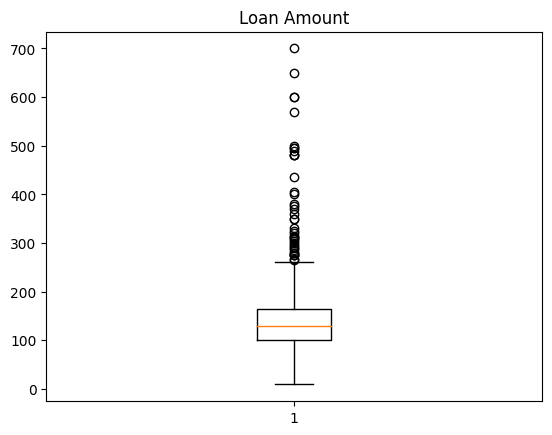

In [44]:
plt.boxplot(data['LoanAmount'])
plt.title('Loan Amount')
plt.show()

In [45]:
Q1b = data['LoanAmount'].quantile(0.25)
Q2b = data['LoanAmount'].quantile(0.5)
Q3b = data['LoanAmount'].quantile(0.75)

In [46]:
IQRb = Q3b - Q1b
low_2 = Q1b - (1.5 * IQRb)
up_2 = Q3b + (1.5 * IQRb)

In [47]:
print(low_2,up_2)

3.5 261.5


In [48]:
data[(data['LoanAmount'] <= 2)].index

Int64Index([], dtype='int64')

In [49]:
print(data['LoanAmount'].skew())

2.726601144105299


In [50]:
print(data['LoanAmount'].quantile(0.10))
print(data['LoanAmount'].quantile(0.90))

72.30000000000001
229.4000000000001


In [51]:
data['LoanAmount'] = np.where(data['LoanAmount'] < 72.3,72.3,data['LoanAmount'])
data['LoanAmount'] = np.where(data['LoanAmount'] > 229.4,229.4,data['LoanAmount'])
print(data['LoanAmount'].skew())

0.5635066758184382


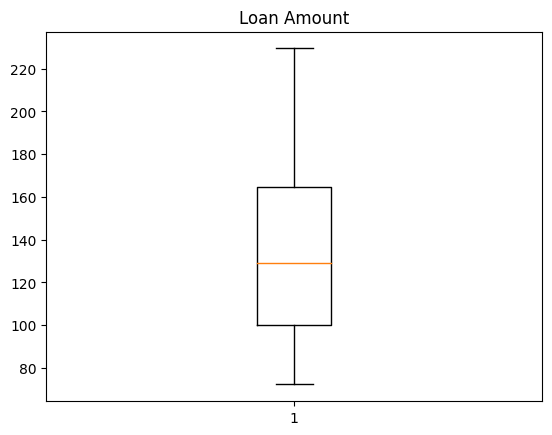

In [52]:
plt.boxplot(data['LoanAmount'])
plt.title('Loan Amount')
plt.show()

In [53]:
#encoding

In [54]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [55]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [56]:
data['Loan_ID'] = le.fit_transform(data['Loan_ID'])
data['Gender'] = le.fit_transform(data['Gender'])
data['Married'] = le.fit_transform(data['Married'])
data['Education'] = le.fit_transform(data['Education'])
data['Self_Employed'] = le.fit_transform(data['Self_Employed'])
data['Loan_Status'] = le.fit_transform(data['Loan_Status'])
data['Property_Area'] = le.fit_transform(data['Property_Area'])

In [57]:
data['Dependents'] = data['Dependents'].astype('int32')

In [58]:
data.dtypes

Loan_ID                int64
Gender                 int64
Married                int64
Dependents             int32
Education              int64
Self_Employed          int64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [59]:
#scaling

In [60]:
x = data.drop(['Loan_Status','Loan_ID'],axis = 1)
y = data['Loan_Status']

In [61]:
from sklearn.preprocessing import MinMaxScaler


In [62]:
mn=MinMaxScaler()

In [63]:
x.loc[:,['LoanAmount','Loan_Amount_Term','Credit_History','ApplicantIncome','CoapplicantIncome']] = mn.fit_transform(x[['LoanAmount','Loan_Amount_Term','Credit_History','ApplicantIncome','CoapplicantIncome']])


In [64]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,0.501519,0.000000,0.471752,0.74359,1.0,2
1,1,1,0,0,0,0.326748,0.398710,0.354551,0.74359,1.0,0
2,1,1,0,0,1,0.108217,0.000000,0.000000,0.74359,1.0,2
3,1,1,0,1,0,0.050650,0.623447,0.303628,0.74359,1.0,2
4,1,0,0,0,0,0.522364,0.000000,0.437301,0.74359,1.0,2


In [65]:
#train_test_split

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [68]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier

In [69]:
clf=DecisionTreeClassifier()

In [70]:
#fit the model
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [71]:
y_pred=clf.predict(x_test)

In [72]:
from sklearn import metrics

In [73]:
print('accuracy:',metrics.accuracy_score(y_test,y_pred))

accuracy: 0.6818181818181818


In [74]:
#bagging classifier

In [75]:
from sklearn.ensemble import BaggingClassifier


In [76]:
tree = DecisionTreeClassifier()

In [77]:
bagging_clf = BaggingClassifier(base_estimator= tree,n_estimators = 100,random_state =42)

In [78]:
bagging_clf.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=42)

In [79]:
y_pred = bagging_clf.predict(x_test)

In [80]:
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7662337662337663


In [81]:
#bagging clasifier using svc


In [82]:
from sklearn.svm import SVC

In [83]:
bagging_clf2 = BaggingClassifier(base_estimator = SVC(),n_estimators = 85,random_state = 42)

In [84]:
bagging_clf2.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=SVC(), n_estimators=85, random_state=42)

In [85]:
y_pred_svm = bagging_clf2.predict(x_test)
print('Accuracy:',metrics.accuracy_score(y_test,y_pred_svm))

Accuracy: 0.7922077922077922


In [86]:
#boosting

In [87]:
#AdaBoostClassifier

In [88]:
from sklearn.ensemble import AdaBoostClassifier

In [89]:
ada_boost_clf = AdaBoostClassifier(n_estimators = 100)

In [90]:
ada_boost_clf.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=100)

In [91]:
y_pred = ada_boost_clf.predict(x_test)
print("Accuracy : ",metrics.accuracy_score(y_test,y_pred))

Accuracy :  0.7727272727272727


In [92]:
#GradientBoostingClassifier

In [93]:
from sklearn.ensemble import GradientBoostingClassifier

In [94]:
grad_boost_clf = GradientBoostingClassifier(n_estimators=100,max_depth=3,random_state=42)
grad_boost_clf.fit(x_train,y_train)

GradientBoostingClassifier(random_state=42)

In [95]:
y_pred_grad = grad_boost_clf.predict(x_test)
print("Accuracy : ",metrics.accuracy_score(y_test,y_pred_grad))

Accuracy :  0.7922077922077922


In [96]:
#xgboost

In [97]:
import xgboost as xgb

xg_boost_clf = xgb.XGBClassifier()
xg_boost_clf.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [98]:
y_pred_xg = xg_boost_clf.predict(x_test)
print("Accuracy : ",metrics.accuracy_score(y_test,y_pred_xg))

Accuracy :  0.7337662337662337


In [99]:
#random forest classifier

In [100]:
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier(n_estimators=100)
clf1.fit(x_train,y_train)

RandomForestClassifier()

In [101]:
y_pred_random = clf1.predict(x_test)